# customFunctions.py testing

In this notebook we test the functions implemented in that file.

In first place, we import the file.

In [1]:
import sys
sys.path.append('../')

from src import customFunctions as cf

### Test of `expand_observable()` function:

We need an observable to expand, lets take: $\hat{O}=\hat{Z_0}\otimes\hat{Z_1}$. We create it as an `SparsePauliOp` class instance:

In [2]:
from qiskit.quantum_info import SparsePauliOp

base_observable  = SparsePauliOp.from_list([("ZZ",1)])
print(base_observable)

SparsePauliOp(['ZZ'],
              coeffs=[1.+0.j])


Now, we expand it in order to work with n qubits: $\hat{O}=\hat{Z}_0\hat{Z}_1 ··· \hat{I}_{n-1} \hat{I}_n$

In [3]:
total_qubits = range(2, 11)

for n_q in total_qubits:
    expanded_observable = cf.expand_observable(base_observable, n_q)
    print(expanded_observable)

SparsePauliOp(['ZZ'],
              coeffs=[1.+0.j])
SparsePauliOp(['ZZI'],
              coeffs=[1.+0.j])
SparsePauliOp(['ZZII'],
              coeffs=[1.+0.j])
SparsePauliOp(['ZZIII'],
              coeffs=[1.+0.j])
SparsePauliOp(['ZZIIII'],
              coeffs=[1.+0.j])
SparsePauliOp(['ZZIIIII'],
              coeffs=[1.+0.j])
SparsePauliOp(['ZZIIIIII'],
              coeffs=[1.+0.j])
SparsePauliOp(['ZZIIIIIII'],
              coeffs=[1.+0.j])
SparsePauliOp(['ZZIIIIIIII'],
              coeffs=[1.+0.j])


### Test of `evaluate_observable()` function:

we use the previous functions to make the needed observable and ansatz:

SparsePauliOp(['ZZ'],
              coeffs=[1.+0.j])


c:\Users\juanl\miniconda3\envs\qiskit-tfm\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


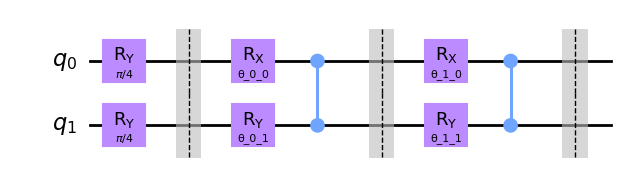

In [4]:
observable  = SparsePauliOp.from_list([("ZZ",1)])
print(observable)

from src import ansatzs as anz

ansatz_circuit, num_params = anz.build_deep_ansatz(2, layers_per_qubit=1)
display(ansatz_circuit.draw("mpl"))

Now we test the function, we have to give some values to the parameters and an `Estimator()` instance:

In [5]:
import numpy as np
from qiskit.primitives import Estimator

params = np.random.random(num_params)
estimator = Estimator()

result = cf.evaluate_observable(params, ansatz_circuit, observable, estimator)

print(result)

-0.05300181391366943


### Test of `evaluate_deriv()` function:

Similar to the previuos fucntions, but we include an index to tell the program in which parameter it should derive:

In [6]:
result = cf.evaluate_deriv(params, ansatz_circuit, observable, 0, estimator)

print(result)

-0.0742234495674948


### Test of `get_variances_data` function:

In [7]:
vars = cf.get_variances_data(num_params, ansatz_circuit, observable, 0, 1000)

print(vars)

(0.2162887635270994, 0.09186494751571182)


### Test of `VQE_minimization_BP` function:


Preparando ejecución para 3 qubits.
Se usarán 12 parámetros


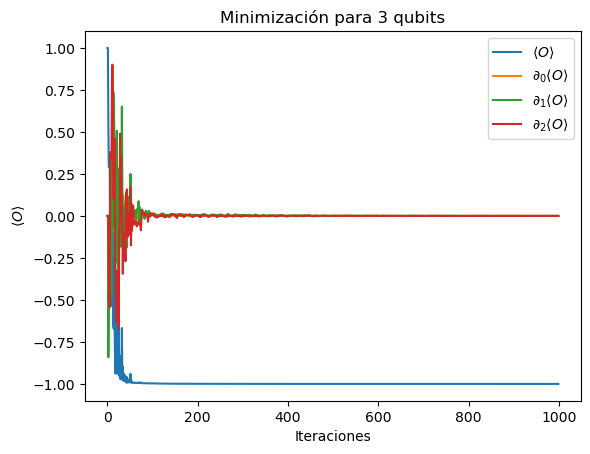

Fin ejecución con 3 qubits. Mínimo encontrado: -0.9999988124885485

Preparando ejecución para 4 qubits.
Se usarán 18 parámetros


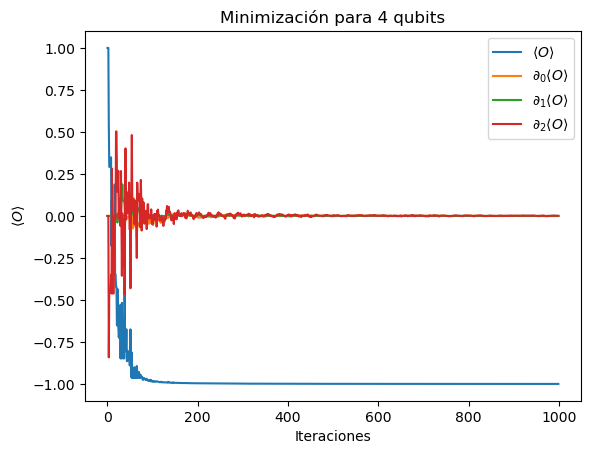

Fin ejecución con 4 qubits. Mínimo encontrado: -0.9997449869377185
{'n_qubits': [3, 4], 'minimum_values': [-0.9999988124885485, -0.9997449869377185]}


In [14]:
data = cf.VQE_minimization_BP(anz.build_Nlocal_ansatz, 3, 4, base_observable, [0,1,2])

print(data)

### Test `variance_vs_nQubits` function:


Calculando varianzas con 3 qubits.

Varianza del valor esperado: 0.18687769092325013
Varianza de la derivada: 0.062189584662037195

Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.11135343793679212
Varianza de la derivada: 0.016212246639180895

Calculando varianzas con 5 qubits.

Varianza del valor esperado: 0.09696415955518471
Varianza de la derivada: 0.013228730482723357

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.09206795881647423
Varianza de la derivada: 0.008165563586951263

Calculando varianzas con 7 qubits.

Varianza del valor esperado: 0.1071911694950784
Varianza de la derivada: 0.0028167413505237817

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.06822472785678775
Varianza de la derivada: 0.001106380042521884

Calculando varianzas con 9 qubits.

Varianza del valor esperado: 0.08278843814232104
Varianza de la derivada: 0.0007473116301060516


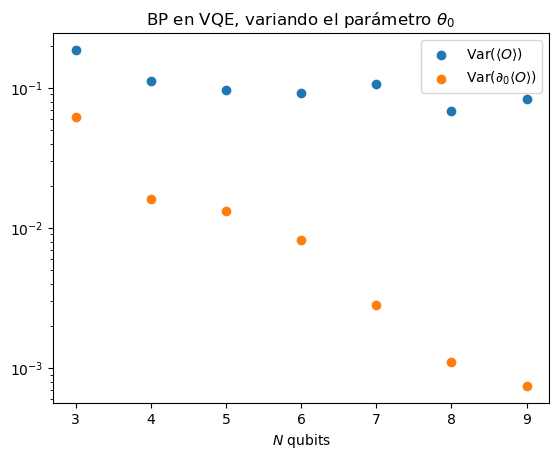

{'n_qubits': [3, 4, 5, 6, 7, 8, 9], 'var_value': [0.18687769092325013, 0.11135343793679212, 0.09696415955518471, 0.09206795881647423, 0.1071911694950784, 0.06822472785678775, 0.08278843814232104], 'var_deriv': [0.062189584662037195, 0.016212246639180895, 0.013228730482723357, 0.008165563586951263, 0.0028167413505237817, 0.001106380042521884, 0.0007473116301060516], 'value_slope': 0, 'value_ord': 0, 'value_rsquare': 0, 'deriv_slope': 0, 'deriv_ord': 0, 'deriv_rsquare': 0}


In [15]:
data = cf.variance_vs_nQubits(anz.build_Nlocal_ansatz, 3, 9, base_observable, 0)

print(data)